# 평가

예측 성능 평가 지표(Evaluation Metric)  
일반적으로 모델이 분류인지 회귀인지에 따라 여러 종류로 나뉨

--------

## 분류의 성능 평가 지표

- 정확도
- 오차(혼돈) 행렬
- 정밀도
- 재현율
- F1 score
- ROC AUC
<br>
<br>
> 위 지표들은 특히 이진 분류(긍정/부정과 같은 2개의 결괏값만을 가짐)에서 더욱 중요하게 강조됨

---------

## 정확도(Accuracy)

> 예측값이 실제값과 동일한 데이터 건 수 / 전체 예측 데이터 건수 

= $\frac{(TN + TP)}{(TN + FP + FN + TP)}$

정확도 평가 지표는 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 <span style="color: #2D3748; background-color:#fff5b1;">불균형한 레이블 데이터 세트에서는 성능 수치로 사용돼서는 안됨</span><br>
따라서, 불균형한 레이블 데이터 세트에서는 성능 수치로 사용해서는 안되며, 여러 가지 분류 지표와 함께 적용하여 ML 모델 성능을 평가해야 함

--------

## 오차 행렬(confusion matrix, 혼동 행렬)

이진 분류의 예측 오류가 얼마인지, 어떤 유형의 예측 오류가 발생하고 있는지 보여줌<br>
ex. TP, FP, FN, TN

<p align="center"><img src="./confusion matrix.png"></p>

In [4]:
from sklearn.metrics import confusion_matrix

In [14]:
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

> **수치적인 판단오류**

불균형한 이진 분류 데이터에서는 Positive 데이터 건수가 매우 작기 때문에 Positive보다는 Negative로 예측 정확도가 높아지는 경향이 발생함

**Positive** 데이터 세트의 예측 성능에 좀 더 **초점을 맞춘 평가지표**를 살펴보자.<br>
ex. 정밀도, 재현율

-----------

## 정밀도(Precision)

"양성 예측도"<br>
예측을 positive로 한 대상 중에 예측과 실제 값이 positive인 데이터 비율<br>

$\frac{TP}{(TP + FP)}$

In [18]:
from sklearn.metrics import precision_score
print("정밀도:", precision_score(y_test, fakepred))

정밀도: 0.0


C:\Users\Min\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> 정밀도가 재현율보다 더 중요한 지표인 경우 : **Negative 음성 데이터를 Positive로 잘못 판단**하는 경우<br>
ex. **스팸 메일** 여부를 판단하는 모델 등

--------

## 재현율(Recall)

"**민감도(Sensitivity)** 또는 **TPR(True Positive Rate)**"<br>
실제 값이 positive인 대상 중에 예측과 실제 값이 모두 positive로 일치한 데이터 비율<br>

$\frac{TP}{(TP + FN)}$

In [19]:
from sklearn.metrics import recall_score
print("재현율:", recall_score(y_test, fakepred))

재현율: 0.0


> 정밀도보다 재현울이 중요 지표인 경우 : 실제 **positive 양성 데이터를 Negative로 잘못 판단**하는 경우<br>
ex. **암 판단 모델, 보험 사기, 금융 사기** 등

--------

> 가장 좋은 성능 평가 : 정밀도와 재현율 모두 높은 수치

정밀도와 재현율 공식을 살펴보면 모두 TP를 높이는 데 동일하기 초점을 맞춤<br>
다른 점은 정밀도는 FP를 낮추고, 재현율은 FN을 낮추는 데 초점을 맞춤<br>
=> 이 같은 특성 때문에 **정밀도와 재현율은 서로 보완적인 지표**로 분류의 성능을 평가함

--------

참고)

# LogisticRegression 파라미터 "solver"

: 최적화 알고리즘 유형을 지정하는 인자<br>
- **libliner** : 보통 작은 데이터 세트의 이진 분류인 경우에 사용하면 성능이 좋음<br>
- **lbfgs** : 기본값으로, 데이터 세트가 상대적으로 크고 다중 분류인 경우에 적합함

-----------

# 정밀도/재현율 트레이드 오프

> "정밀도, 재현율 어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬움"

업무 특성상 정밀도 또는 재현율이 특별히 강조되어야 할 경우 분류의 결정 임계값(Threshold)을 조정하여 수치를 높일 수 있음<br>
하지만 둘은 서로 상호 보완적인 평가 지표이기 때문에 이러한 현상이 발생함

일반적으로 이진 분류에서는 임계값(Threshold)을 0.5, 즉 50%로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정함

## predict_proba()

: 각 데이터별 예측 확률을 반환<br>
- predict() 메서도와 유사하지만 단지 반환 결과가 예측 결과 클래스값이 아닌 예측 확률 결과임

[[87 10]
 [26 31]]
정확도: 0.7662337662337663, 
정밀도: 0.7560975609756098, 
재현율: 0.543859649122807 
f1: 0.6326530612244897 
AUC: 0.8343280882618918


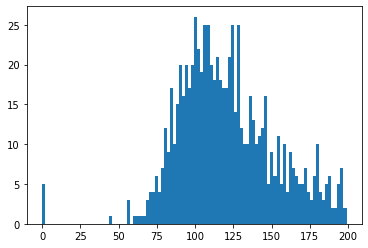

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes = pd.read_csv('diabetes.csv')
diabetes

diabetes['Outcome'].value_counts()

X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

def get_clf_eval2(y_test, y_pred, pred_proba):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print(confusion)
    print(f'정확도: {accuracy}, \n정밀도: {precision}, \n재현율: {recall} \nf1: {f1} \nAUC: {roc_auc}')

get_clf_eval2(y_test, y_pred, pred_proba)

#Glucose 값이 0인것들을 확인해보자
plt.hist(diabetes['Glucose'], bins = 100)
plt.show()

In [54]:
#0을 각 칼럼의 평균으로 대체
zero_features = ['Glucose', 'BloodPressure', 'Insulin', 'BMI']
diabetes[zero_features] = diabetes[zero_features].replace(0,diabetes[zero_features].mean())

#표준화
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval2(y_test, y_pred, pred_proba)

[[83 14]
 [25 32]]
정확도: 0.7467532467532467, 
정밀도: 0.6956521739130435, 
재현율: 0.5614035087719298 
f1: 0.6213592233009708 
AUC: 0.8303490685476578


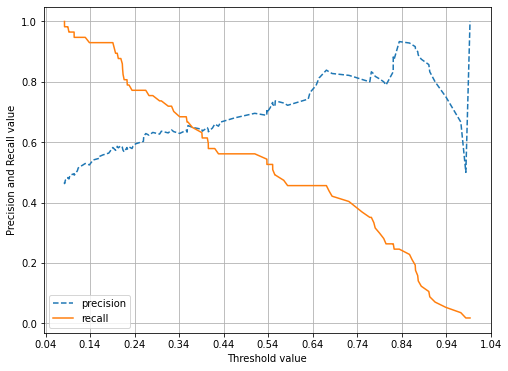

[[83 14]
 [25 32]]
정확도: 0.7467532467532467, 
정밀도: 0.6956521739130435, 
재현율: 0.5614035087719298 
f1: 0.6213592233009708 
AUC: 0.8303490685476578


In [55]:
# ROC 곡선과 AUC

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    # X축: 임곗값(thresholds), Y축: 정밀도(precision), 재현율(recall)
    plt.figure(figsize=(8,6))
    plt.plot(thresholds, precisions[0:len(thresholds)], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:len(thresholds)], label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

get_clf_eval2(y_test, y_pred, pred_proba)

In [64]:
# 임곗값 바꾸기
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.36)
y_pred = binarizer.fit_transform(pred_proba.reshape(-1,1))
get_clf_eval2(y_test, y_pred, pred_proba)

[[77 20]
 [19 38]]
정확도: 0.7467532467532467, 
정밀도: 0.6551724137931034, 
재현율: 0.6666666666666666 
f1: 0.6608695652173913 
AUC: 0.8303490685476578


--------------

# F1 스코어

  
F1 = 2 * $\frac{(precision * recall)}{(precision + recall)}$
  

: 정밀도와 재현율을 결합한 지표로, 높을수록 예측 성능 좋음

In [58]:
from sklearn.metrics import f1_score

In [60]:
f1 = f1_score(y_test, y_pred)

In [62]:
np.round(f1, 4)

0.6609

---------

# FPR(False Positive Rate)

$\frac{FP}{FP + TN}$

<span style="color: #2D3748; background-color:#fff5b1;">**"1 - TNR" 또는 "1 - 특이성"**</span> 으로 표현함

# TPR(Ture Positive Rate, 재현율, 민감도)

실제 positive 데이터가 정확히 예측되어야 하는 수준을 나타냄

# TNR (True Negative Rate, 특이성, Specificity)

$\frac{TN}{FP + TN}$

<span style="color: #2D3748; background-color:#fff5b1;">**민감도(재현율)에 대응**하는 지표</span><br>
실제 negative 데이터가 정확히 예측 되어야 하는 수준을 나타냄

---------

# ROC곡선과 AUC

이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표

## ROC(Receiver Operation Characteristic Curve)

수신자 판단 곡선<br>
FPR이 변할 때 TPR이 어떻게 변하는지를 나타낸 곡선(X = FPR, Y = TPR)
- 가운데 직선(ROC 곡선의 최저값)에 가까워질수록 성능이 떨어지고, 멀어질수록 성능이 뛰어남

> 분류 결정 임곗값(positive 예측값을 결정하는 확률의 기준)

FPR을 0으로 만들려면? -> 임곗값을 1로 지정<br>
임곗값을 1로 지정하면 positive 예측 기준이 매우 높기 때문에 classifier가 임곗값보다 높은 확률을 가진 데이터를 positive로 예측할 수 없음

반대로 FPR을 1로 만들려면? -> TN을 0으로 만들면 됨 -> 임곗값을 0으로 지정<br>
classifier의 positive 확률 기준이 너무 낮아서 다 positive로 예측하고, negative가 없기 때문에 TN이 0이 됨

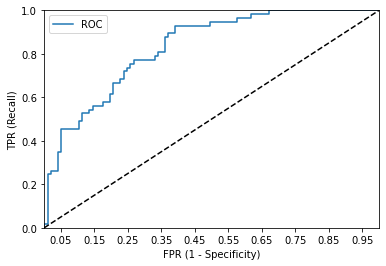

In [65]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , pred_proba):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음
    FPR , TPR , thresholds = roc_curve(y_test ,pred_proba)

    # ROC Curve를 plot 곡선으로 그림 
    plt.plot(FPR , TPR, label='ROC')
    
    # 가운데 대각선 직선을 그림 
    plt.plot([0, 1], [0, 1], 'k--')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정 등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR (1 - Specificity)')
    plt.ylabel('TPR (Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

## AUC(Area Under Curve)

: ROC 곡선 밑의 면적을 구한 것
- 일반적으로 1에 가까울수록 좋은 수치
- 분류의 성능 지표로 사용
- AUC 수치가 커지려면 "FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐"가 중요함

In [68]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba) # roc auc 값 구하기
roc_score

0.8303490685476578

--------------